In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [75]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.describe(include='all')

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Data Description:

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer. 
	
		Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers (Target Variable - Happiness Index)
		X1 = my order was delivered on time  (Delivery Time) 
		X2 = contents of my order was as I expected (Product Quality)
		X3 = I ordered everything I wanted to order (Product Availability)
		X4 = I paid a good price for my order (Order Pricing)
		X5 = I am satisfied with my courier (Courier Feedback)
        X6 = the app makes ordering easy for me (Application Feedback)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


Observations:

The dataset does not contain any null values and outliers.


In [77]:
len(df.drop_duplicates())

110

Observations:

There are 16 duplicates present in the dataset which need to be removed.

In [78]:
df.drop_duplicates(inplace = True)
df.reset_index(drop= True, inplace = True)
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,1,5,5,3,5,5,5
...,...,...,...,...,...,...,...
105,0,4,4,4,4,1,3
106,1,5,2,3,4,4,3
107,1,5,2,3,4,2,5
108,0,4,3,3,4,4,5


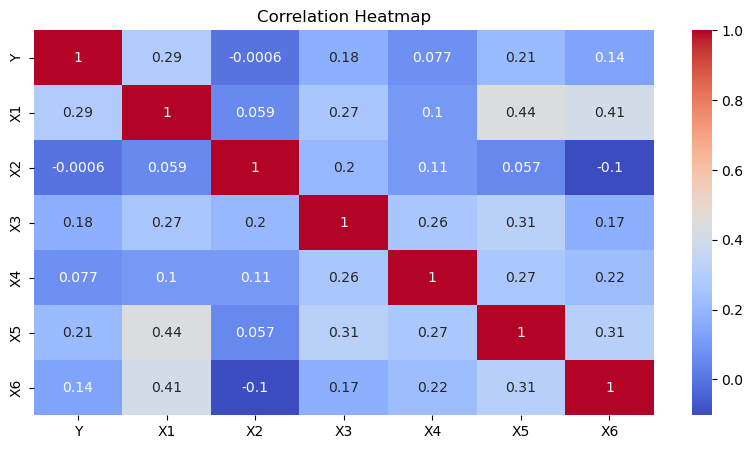

In [79]:
#checking correlation strengh
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap="coolwarm" , annot = True )
plt.title("Correlation Heatmap")
plt.show()

X1 (Delivery time) and X5 (Courier feedback) shows a stronger correlation in comparison to the remaining features.

X2 (Product Quality) and X4 (Order pricing) shows the least correlation for predicting customer satisfaction.

<Figure size 700x700 with 0 Axes>

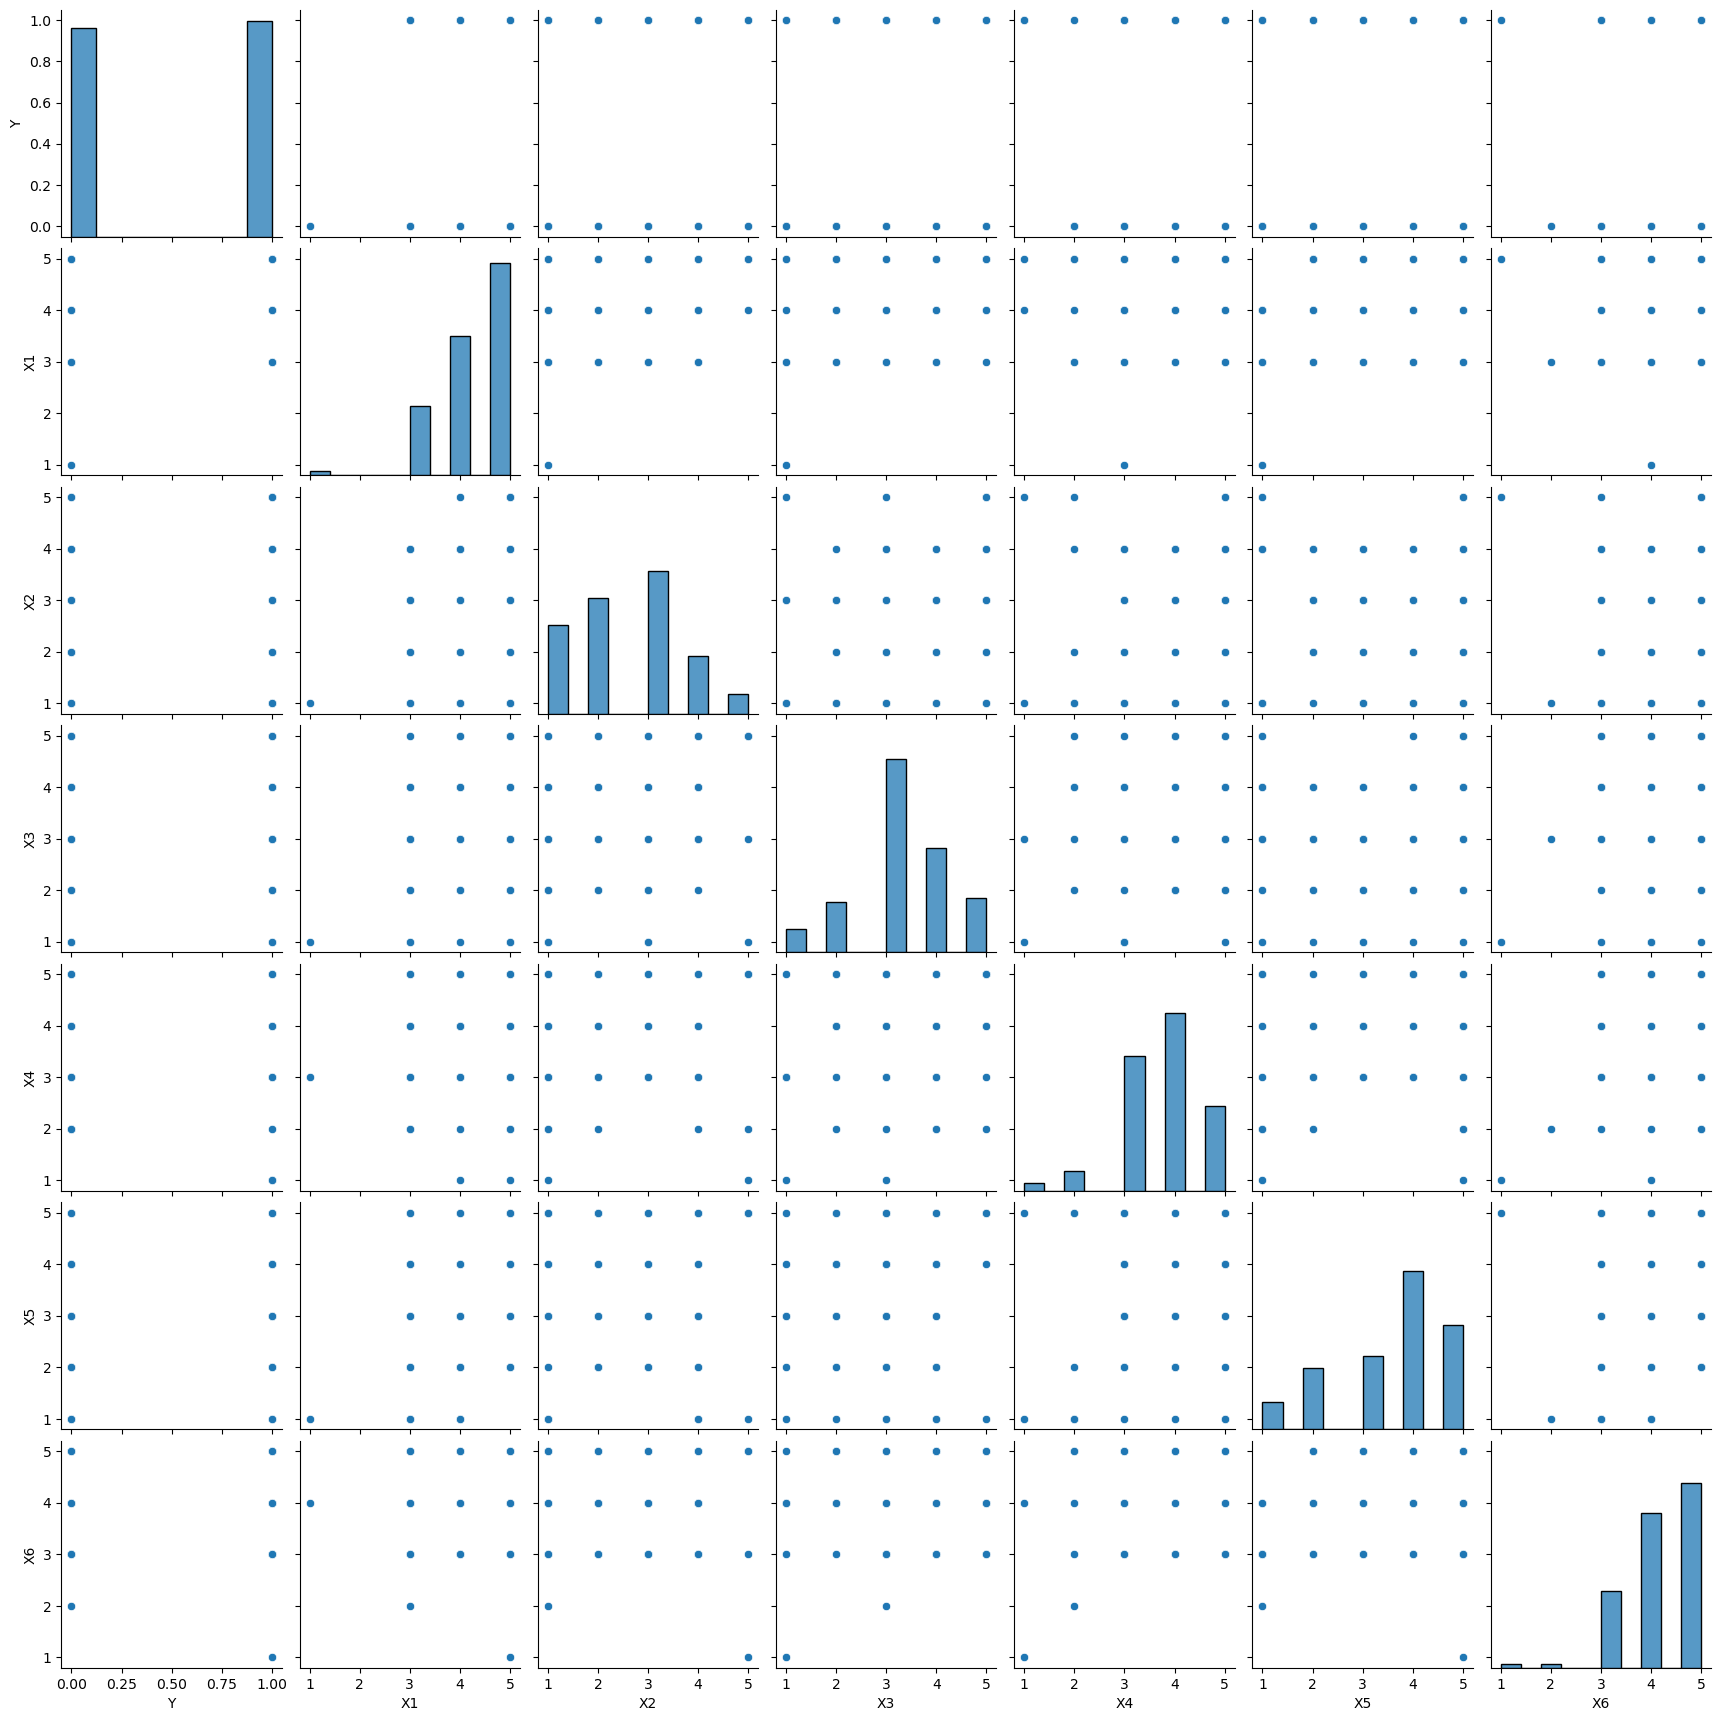

In [80]:
plt.figure(figsize=(7,7))
sns.pairplot(df)
plt.show()

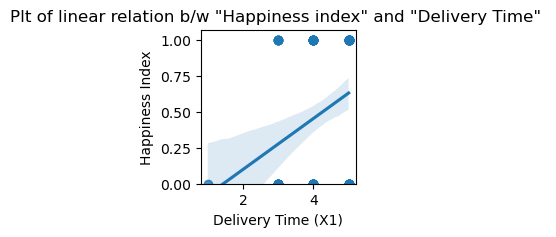

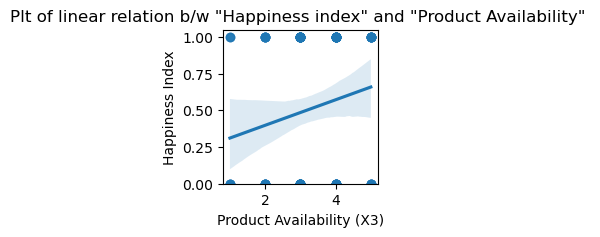

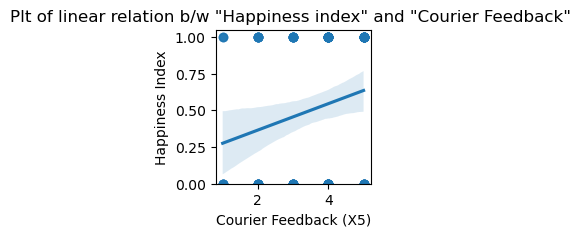

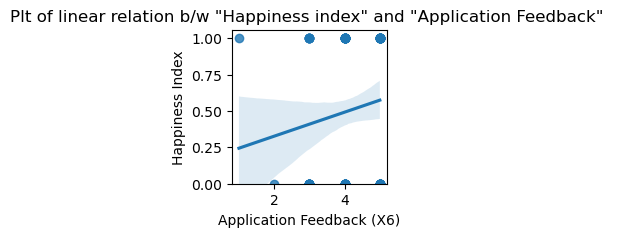

In [81]:
plt.figure(figsize=(2,2))
sns.regplot(x="X1",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Delivery Time (X1)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Delivery Time" ')
plt.show()

plt.figure(figsize=(2,2))
sns.regplot(x="X3",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Product Availability (X3)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Product Availability" ')
plt.show()

plt.figure(figsize=(2,2))
sns.regplot(x="X5",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Courier Feedback (X5)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Courier Feedback" ')
plt.show()

plt.figure(figsize=(2,2))
sns.regplot(x="X6",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Application Feedback (X6)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Application Feedback" ')
plt.show()

Observation: 

X1 demonstrates the highest positive correlation compared to the other features. On the other hand, X3, X5, and X6 exhibit positive correlations, albeit weaker when compared to the X1 feature. There are few outliers observed in all the features that doesnt fit the linear relatiosnship. 

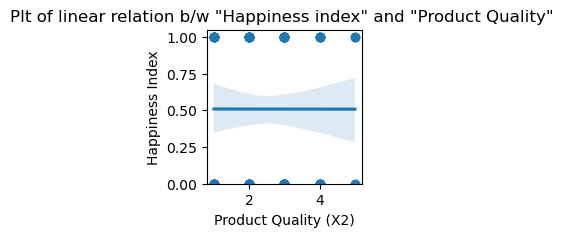

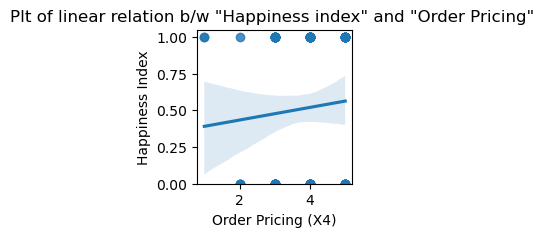

In [82]:
plt.figure(figsize=(2,2))
sns.regplot(x="X2",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Product Quality (X2)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Product Quality" ')
plt.show()

plt.figure(figsize=(2,2))
sns.regplot(x="X4",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Order Pricing (X4)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Order Pricing" ')
plt.show()

Observation:

X2 and X4 exhibit the least correlation, making them inadequate for predicting the target variable.

In [83]:
y_value_count = df["Y"].value_counts()
X1_value_count = df["X1"].value_counts()
X3_value_count = df["X3"].value_counts()
X5_value_count = df["X5"].value_counts()
X6_value_count = df["X6"].value_counts()
X1_value_count, X3_value_count, X5_value_count, X6_value_count, y_value_count

(5    55
 4    36
 3    18
 1     1
 Name: X1, dtype: int64,
 3    50
 4    27
 5    14
 2    13
 1     6
 Name: X3, dtype: int64,
 4    41
 5    27
 3    19
 2    16
 1     7
 Name: X5, dtype: int64,
 5    48
 4    40
 3    20
 2     1
 1     1
 Name: X6, dtype: int64,
 1    56
 0    54
 Name: Y, dtype: int64)

In [159]:
y = df["Y"]
X= df.drop(["Y","X2","X4"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100 )

In [161]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
svm = SVC()


#model = [lr,knn,dt,rf,nb,svm,lgbm,xgb]

model = [knn,lgbm]

def models(model):
    for i in model:
        i.fit(X_train,y_train)
        i.pred = i.predict(X_test)
        print("\nSelected Model :",i)
        print(i,"Model training Accuracy : ", i.score(X_train,y_train)*100)
        print(i,"Model testing Accuracy : ", accuracy_score(y_test,i.pred)*100)
        print(i,"f1_score:", f1_score(y_test,i.pred))
        print("\n\n")

models(model)


Selected Model : KNeighborsClassifier()
KNeighborsClassifier() Model training Accuracy :  69.31818181818183
KNeighborsClassifier() Model testing Accuracy :  77.27272727272727
KNeighborsClassifier() f1_score: 0.8148148148148148



[LightGBM] [Info] Number of positive: 42, number of negative: 46
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477273 -> initscore=-0.090972
[LightGBM] [Info] Start training from score -0.090972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Observation: 

Currently, both K-Nearest Neighbors (knn) and LightGBM (lgbm) are temporarily selected as they attained an accuracy of 77.2%, which outperforms the other models.

The accuracy of the knn model has significantly improved from 50% to 77.2% after dropping features X2 and X4, which exhibited the lowest correlation to Y. In contrast, the accuracy of the lgbm model remained unchanged throughout this.

At present, the knn and lgbm classifiers gives an accuracy of 77.2%, but this is only accomplished for a test size of 20% and a random_state value of 100. To ensure consistent and reliable accuracy, further tuning of the models is necessary.

To do:
    1) Detailed exploration of parameter tuning for knn and lgbm models.
    2) Explore alternative models to identify the most suitable one for this dataset.
  

Concerns:
    1) The standard procedures to enhance accuracy need to be clarified.
    2) The potential for overfitting while utilizing the knn model should be addressed.
    3) Removing the outliers spotted in regplot.
    4) Are the warnings in lgbm because of the missing hyperparameter tuning, how does that affect the accuracy.
    5) Need for feature scaling, although the numbers are between 1 to 5.

In [162]:
#finding the k value
import math
math.sqrt(len(y_test))

4.69041575982343

In [163]:
knn_temp = KNeighborsClassifier(n_neighbors = 3, p=2, metric="euclidean")
knn_temp.fit(X_train,y_train)
knn_temp.pred = knn.predict(X_test)
print("knn improved model training Accuracy : ", knn_temp.score(X_train,y_train)*100)
print("knn improved Model testing Accuracy : ", accuracy_score(y_test,knn_temp.pred)*100)
cm = confusion_matrix(y_test,knn_temp.pred)
print(cm)
print(f1_score(y_test,knn_temp.pred))

knn improved model training Accuracy :  76.13636363636364
knn improved Model testing Accuracy :  77.27272727272727
[[ 6  2]
 [ 3 11]]
0.8148148148148148


C:\Users\rahul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Observation:

knn model training accuracy seem to have improved a little.